# STEP 1: IMPORT LIBRARIES AND DATASET

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [13]:
X_validation.shape

(4410, 32, 32, 3)

In [15]:
y_validation.shape

(4410,)

In [17]:
X_test.shape

(12630, 32, 32, 3)

In [18]:
y_test.shape

(12630,)

# STEP 2: IMAGE EXPLORATION.

36

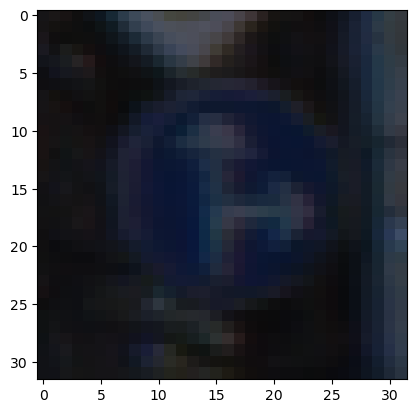

In [24]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]


4

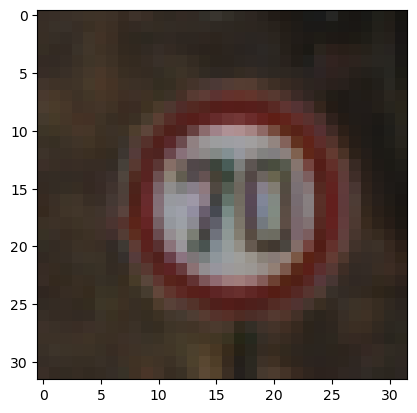

In [25]:
i = 1001
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

12

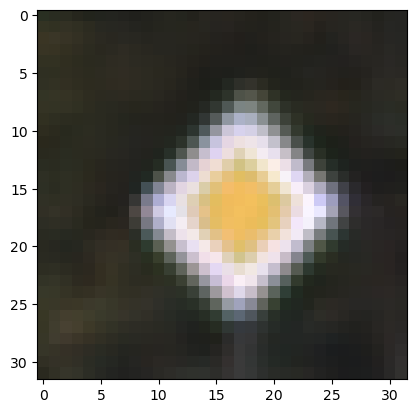

In [28]:
i = 1002
plt.imshow(X_test[i]) # Show images are not shuffled
y_test[i]

# STEP 3: DATA PREPARATION

In [29]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [30]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [31]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [34]:
X_train_gray_norm

array([[[[ 0.70833333],
         [ 0.71614583],
         [ 0.69791667],
         ...,
         [ 0.13020833],
         [ 0.19010417],
         [ 0.1015625 ]],

        [[ 0.7109375 ],
         [ 0.71614583],
         [ 0.69791667],
         ...,
         [ 0.06510417],
         [ 0.09895833],
         [ 0.01041667]],

        [[ 0.71614583],
         [ 0.71875   ],
         [ 0.70052083],
         ...,
         [-0.12760417],
         [-0.12239583],
         [-0.1328125 ]],

        ...,

        [[-0.70052083],
         [-0.70572917],
         [-0.72135417],
         ...,
         [-0.70572917],
         [-0.76302083],
         [-0.80989583]],

        [[-0.65885417],
         [-0.67708333],
         [-0.69270833],
         ...,
         [-0.703125  ],
         [-0.75260417],
         [-0.79947917]],

        [[-0.703125  ],
         [-0.70572917],
         [-0.71614583],
         ...,
         [-0.71614583],
         [-0.7734375 ],
         [-0.8203125 ]]],


       [[[-0.83854167],


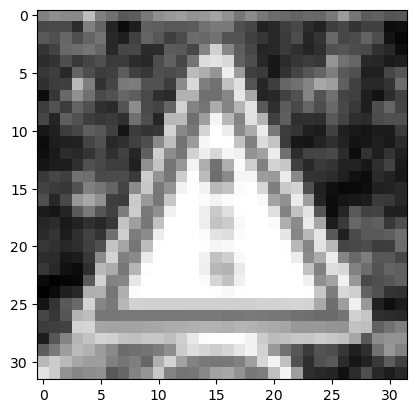

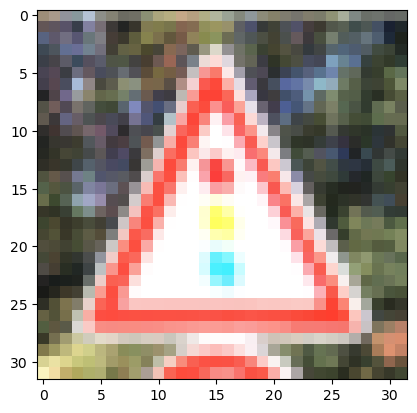

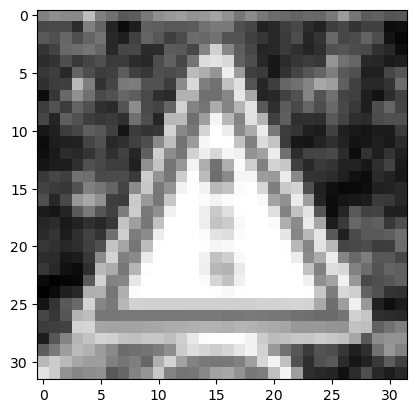

In [35]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

# STEP 4: MODEL TRAINING

In [36]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [43]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [48]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [52]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1124 - loss: 3.4159 - val_accuracy: 0.2873 - val_loss: 2.6782
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4712 - loss: 1.9455 - val_accuracy: 0.5789 - val_loss: 1.4465
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6934 - loss: 1.0443 - val_accuracy: 0.7045 - val_loss: 1.0108
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7901 - loss: 0.7242 - val_accuracy: 0.7381 - val_loss: 0.8594
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8456 - loss: 0.5542 - val_accuracy: 0.7637 - val_loss: 0.7894
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8703 - loss: 0.4640 - val_accuracy: 0.7950 - val_loss: 0.6863
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9000 - loss: 0.3806 - val_accuracy: 0.7918 - val_loss: 0.7071
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9110 - loss: 0.3352 - val_accuracy: 0.8279 - v

# STEP 5: MODEL EVALIATION

In [53]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8568


In [54]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

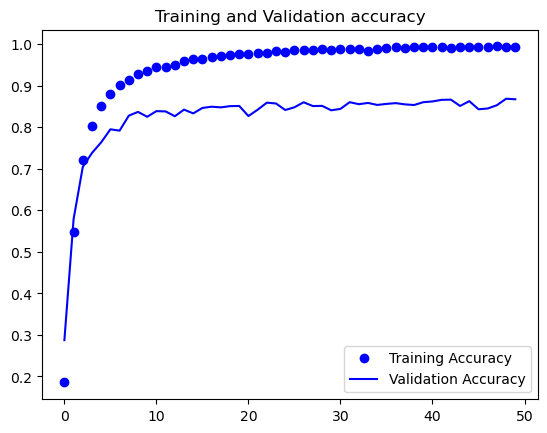

In [61]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

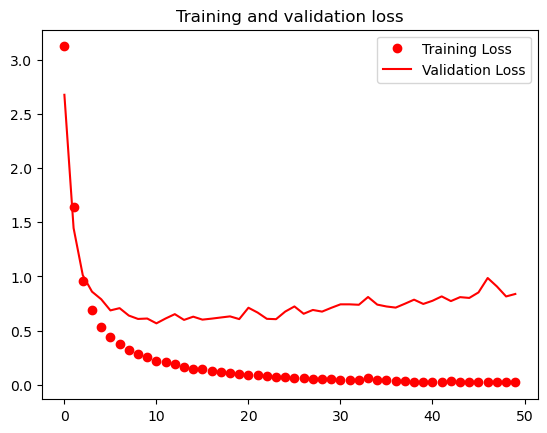

In [62]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=-1)
y_true = y_test


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

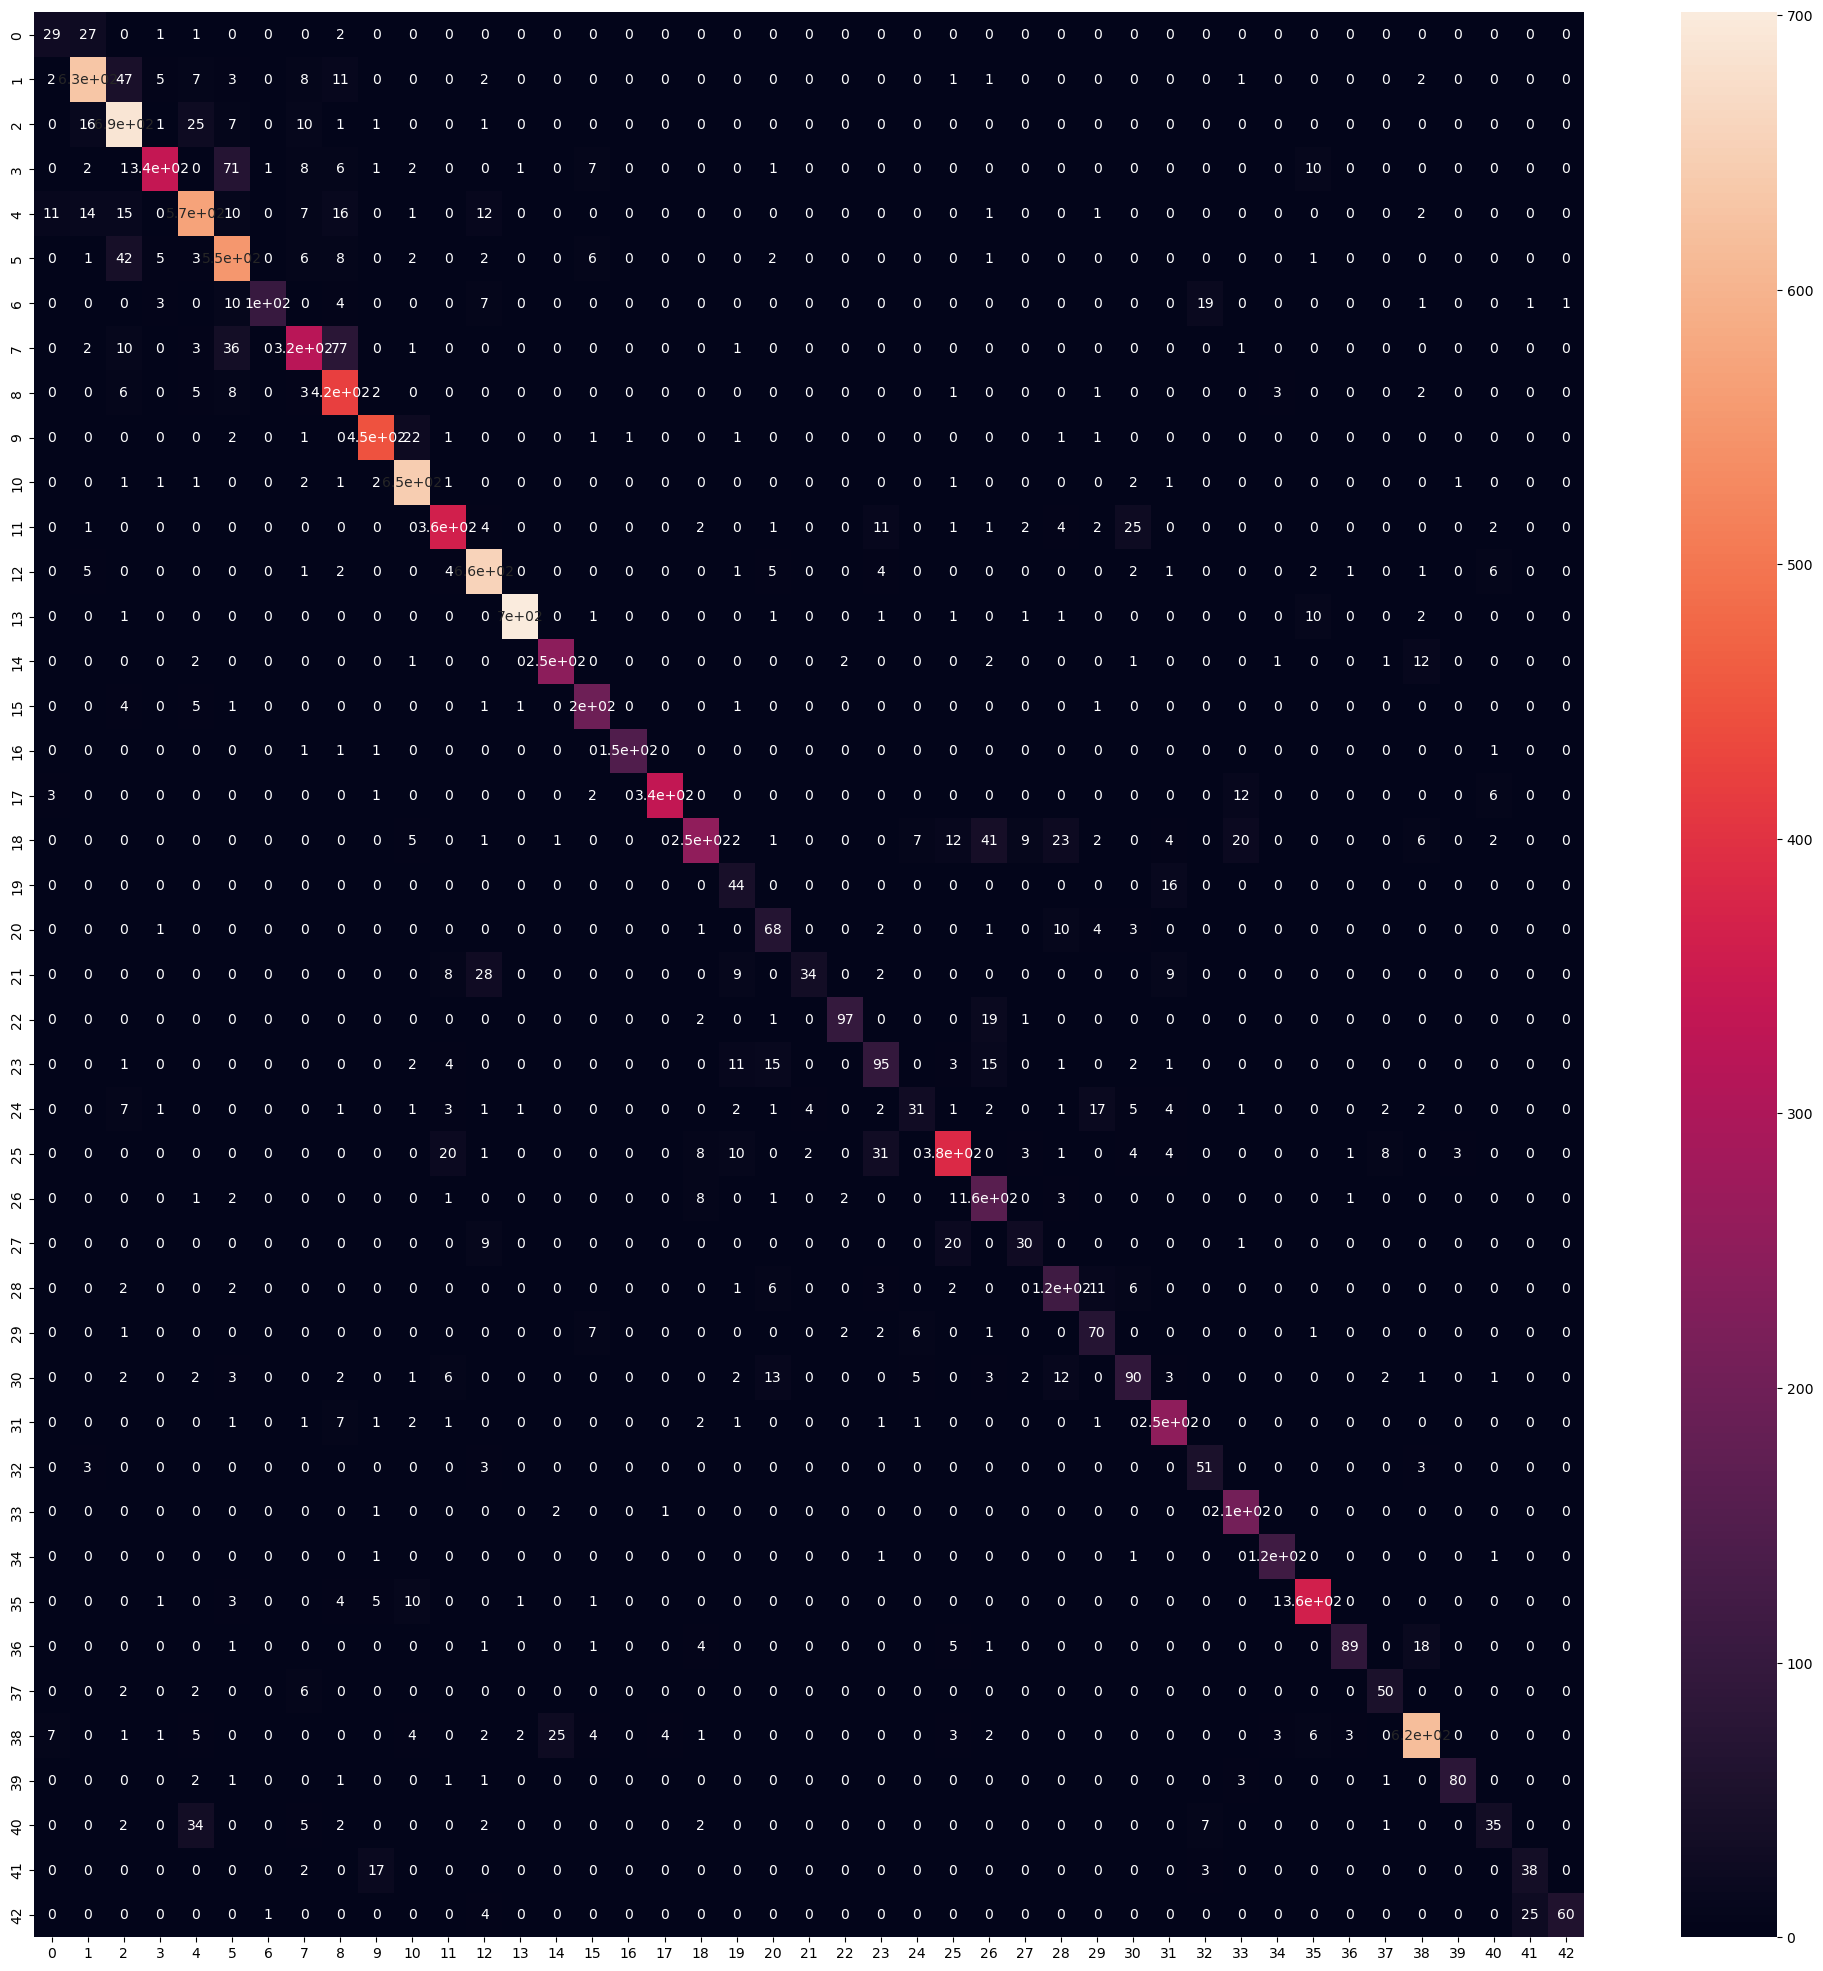

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

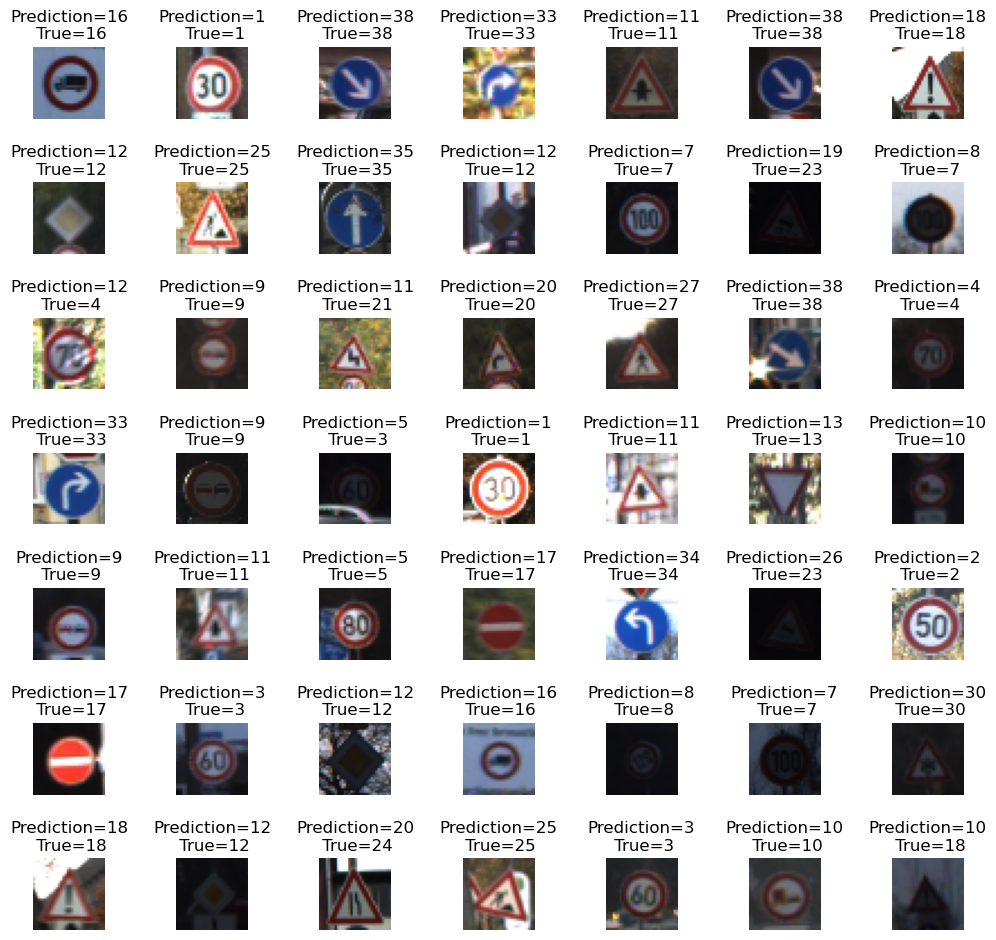

In [69]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)